
<div hidden>

$\gdef\dd{\mathrm{d}}$

</div>

<div hidden>

$\gdef\abs#1{\left\vert#1\right\vert}$

</div>

<div hidden>

$\gdef\ve#1{\bm{#1}}$
</div>

<div hidden>

$\gdef\mat#1{\mathbf{#1}}$
</div>

<div hidden>
Authors: Felipe Uribe and Amal Alghamdi
</div>

# Two forward models

## <font color='blue'> Contents of this notebook: </font>
  * [Learning objectives](#r-learning-objectives)
  * [Forward model: 1D Poisson](#r-forward-model-1d-poisson)
  * [Forward model: 1D convolution](#r-forward-model-1d-convolution)


## <font color='blue'> Learning objectives: </font> <a name="r-learning-objectives"></a>
  * Create (or load pre-existing) linear and non-linear forward models in CUQIpy and use them
  * Create and plot input for the forward models and compute and plot the corresponding output
  * Mathematically define two forward models: 1D Poisson and 1D Convolution and use them in CUQIpy
  

In [135]:
from cuqi.testproblem import Poisson1D, Deconvolution1D, Heat1D
from cuqi.distribution import Gaussian
from cuqi.array import CUQIarray
import numpy as np
import matplotlib.pyplot as plt

## <font color='blue'> Forward model: 1D Poisson </font> <a name="r-forward-model-1d-poisson"></a>

Consider a heat conductive rod of length $L = \pi$ with a varying conductivity (the conductivity of the rod changes from point to point). We fix the temperature at the end-points of the rod and apply a heat source distributed along the length of the rod. We wait until the rod reaches an equilibrium temperature distribution. The equilibrium temperature of the rod is modelled using the second order steady-state PDE as

$$
\left\{
\begin{aligned}
& \dfrac{\dd}{\dd \xi}\left(u(\xi) \dfrac{\dd y(\xi)}{\dd \xi}\right) = -f(\xi), \quad & \xi\in (0,L) \\
& y(0) = y(L) = 0.
\end{aligned}
\right.
$$
Here, $y$ represents the temperature distribution along the rod, $u(\xi) $ is the unkown conductivity of the rod and $f(\xi)$ is a deterministic heat source given by
\begin{equation*}
	f(\xi) = 10\exp( -\frac{ (\xi - L/2)^2} {0.02} ).
\end{equation*}
To ensure that the conductivity of the rod is non-negative, we parameterize $u$ by a random variable $x$ as follows:
 $$u( \cdot  ) = \exp( x( \cdot  ) )$$
 
 where $x$ is not necessarily positive.

Let us load the forward model that maps the random variable $x$ to the temperature distribution $y$ in CUQIpy. We will use the following parameters:
* `dim` : number of discretization points for the rod
* `L` : length of the rod
* `f` : a function that represents the heat source

In [136]:
dim = 128
L = np.pi
f = lambda xi: 10*np.exp(-(xi-L/2)**2 / 0.02)

Then we can load the 1D Poisson forward model as follows:

In [137]:

A = Poisson1D(dim=dim, endpoint=L, source=f).model

We print the forward model to see its details.

In [138]:
A

CUQI PDEModel: Continuous1D(128,) -> Continuous1D(127,).
    Forward parameters: ['x'].
    PDE: SteadyStateLinearPDE.

We can look at the domain and range geometries of the forward model.

In [139]:
print(A.domain_geometry)
print(A.range_geometry)

Continuous1D(128,)
Continuous1D(127,)


These geometries are of type `Continuous1D` which represents a 1D continuous signal/field defined on a grid. We can view the grid:

In [140]:
print(A.domain_geometry.grid)

[0.         0.02473695 0.0494739  0.07421085 0.0989478  0.12368475
 0.1484217  0.17315865 0.1978956  0.22263255 0.2473695  0.27210645
 0.2968434  0.32158035 0.3463173  0.37105425 0.3957912  0.42052815
 0.4452651  0.47000205 0.494739   0.51947595 0.5442129  0.56894985
 0.5936868  0.61842375 0.6431607  0.66789765 0.6926346  0.71737155
 0.7421085  0.76684545 0.7915824  0.81631935 0.8410563  0.86579325
 0.8905302  0.91526715 0.9400041  0.96474105 0.989478   1.01421495
 1.0389519  1.06368885 1.0884258  1.11316275 1.1378997  1.16263665
 1.1873736  1.21211055 1.2368475  1.26158445 1.2863214  1.31105835
 1.3357953  1.36053225 1.3852692  1.41000615 1.4347431  1.45948005
 1.484217   1.50895395 1.5336909  1.55842785 1.5831648  1.60790175
 1.6326387  1.65737565 1.6821126  1.70684955 1.7315865  1.75632345
 1.7810604  1.80579735 1.8305343  1.85527125 1.8800082  1.90474515
 1.9294821  1.95421905 1.978956   2.00369295 2.0284299  2.05316685
 2.0779038  2.10264075 2.1273777  2.15211465 2.1768516  2.2015

Additionally, the properties `domain_dim` and `range_dim` of the forward model represent the dimension of the input and output of the forward model, respectively.

In [141]:
print(A.domain_dim)
print(A.range_dim)

128
127


Let us create an array representing a constant conductivity over the grid nodes 

In [142]:
some_x_array = 20*np.ones(A.domain_dim)

We can wrap the array in a `CUQIarray` object which is the main data structure in CUQIpy for variables (e.g. arrays and fields)

In [143]:
some_x = CUQIarray(some_x_array, geometry=A.domain_geometry)

Note that we pass `geometry=A.domain_geometry` to equip the `CUQIarray` object with the same geometry as the domain of the forward model, which is has information about what the values of the array represent (e.g. function values on a grid for this case).

We can plot the conductivity array using the `plot` method of the `CUQIarray` object

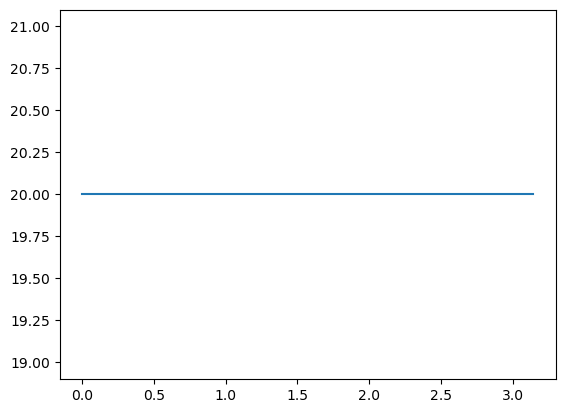

In [144]:
some_x.plot()

We can also evaluate the forward model at the conductivity array and plot the solution:

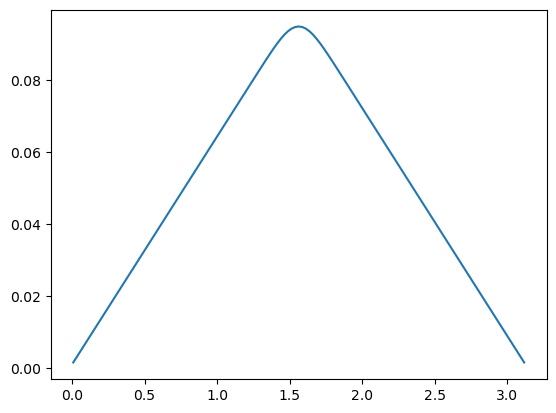

In [145]:
some_y = A(some_x)
some_y.plot()

#### <font color='magenta'> Exercise: </font>
  * Is this true for you: **"I can, mathematically, write a definition of a 1D Poisson forward model that maps the conductivity field to the temperature distribution field"**? If not, what questions do you have?
  * Trying a different conductivity profile: 
      * Create another constant conductivity profile `another_x` of value 20 as a `CUQIarray` object.
      * Evaluate the forward model at the new conductivity profile and store the result in a variable `another_y`. Plot the solution.
      * In one plot, compare the solutions `some_y` and `another_y` using the `plot` method of the `CUQIarray` object. What do you observe? and why?
  * Experimenting with setting up the `map` in `Poisson1D`:
      * execute `help(Poisson1D)`
      * Note the `map` parameter of `Poisson1D`. We can use this parameter to transform the conductivity field before solving the PDE. Create the forward model again, name it `A_map`, with setting up `map` to be `lambda x: np.exp(x)` to ensure that the conductivity is always positive.
      * Inspect the domain and range geometries of the new forward model `A_map` what is different this time, and why?
      * create a CUQIarray object `x_with_map` with a constant conductivity profile of value 0 and evaluate the forward model at `x_with_map` and store it in variable `y_with_map`. Make sure to use the right geometry for `x_with_map`.
      * Plot `x_with_map` using `x_with_map.plot()`, What do you observe?
      * Plot the solution `y_with_map` and `some_y` in the same plot. What do you observe? and why?
  * Experimenting with setting up the `field_type` in `Poisson1D`:
      * Note the `field_type` parameter of `Poisson1D`. We can use this parameter to change the parameterization of the conductivity field. Create the forward model again, name it `A_step`, with setting both the `map` as in the previous exercise and the `field_type` to be `"Step"` to generate a step parameterization of the conductivity field.
      * What is the domain and range geometries of the new forward model `A_step`?
      * Create `x_step` to be `x_step = CUQIarray(np.arange(A_step.domain_dim)*0.1, geometry=A_step.domain_geometry)`.
      * Plot `x_step` using `x_step.plot()`.
      * What does the dimension `A_step.domain_dim` represent? and is it equal to the size of the domain geometry grid?
      Evaluate the forward model at `x_step` and store it in variable `y_step`. Plot the solution.
    * Is this true for you: **"I can load pre-existing forward models in CUQIpy and evaluate them on some input and visualize the input and output"**? If not, what questions do you have?

## <font color='blue'> Forward model: 1D convolution </font> <a name="r-forward-model-1d-convolution"></a>

The mathematical model for convolution of a random signal on a one-dimensional spatial domain $D=[0,1]$, can be written as a stochastic Fredholm integral equation of the first kind:
$$
y(x,\omega) = \int_{0}^{1} k(x,x')X(x',\omega)\,\dd x' \quad\text{with}\quad k(x,x') = \frac{b}{2\exp\left(-b\abs{x-x'}\right)},
$$
where $y(x,\omega)$ denotes the convolved signal random variable and we assume a deterministic convolution kernel $k$ with fixed parameter $b=48$. In practice, a finite-dimensional representation of \eqref{eq:1D_deconv} is employed. After discretizing the signal domain into $N$ components, the convolution model can be expressed as a system of linear algebraic equations $\ve{y}(\omega)=\mat{K}\ve{x}(\omega)$. 

This problem is implemented in the CUQI toolbox as $$\texttt{model}=\texttt{cuqi.model.Deconv\_1D}(N, L, \texttt{kernel}, \texttt{field\_type}, \texttt{KL\_map}),$$
where $N$ is the domain discretization, $L=1$ is the length of the domain, $\texttt{kernel}$ is a function with the convolution kernel implementation $\texttt{field\_type}=\{\texttt{None},\texttt{KL},\texttt{CustomKL},\texttt{Step}\}$ defines the random field generation (specified in the projects), and $\texttt{KL\_map}$ is a function with the transformation of a Gaussian field (in our case is always $x=\exp(u)$). To obtain a forward solution on the domain $D$ given a Gaussian parameter vector, we simply use $\texttt{y~=~model.forward(u)}$